In [1]:
import MDAnalysis as mda
import prolif as plf

/home/yuyang/Project_local/ProLIF/.venv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


# explicit methods

In [2]:
data_path = "../../prolif/data/implicitHbond/1s2g__1__1.A_2.C__1.D"
protein_path = f"{data_path}/receptor_ph7_amber2.pdb"
u = mda.Universe(protein_path)
protein_mol = plf.Molecule.from_mda(u)
protein_mol.n_residues

332

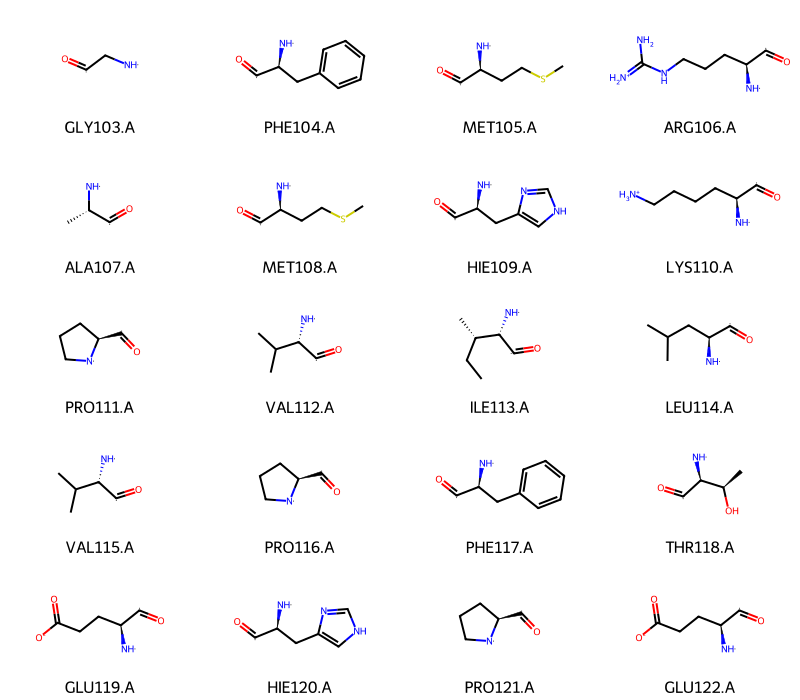

In [3]:
# check that residues 260 to 262 were processed correctly
# remove the `slice(260, 263)` part to show all residues
plf.display_residues(protein_mol, slice(100, 120))

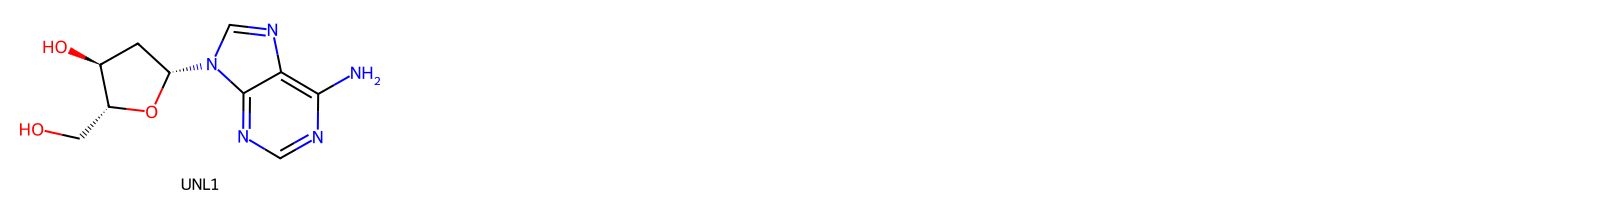

In [4]:
supplier = plf.sdf_supplier(f"{data_path}/ligand_files/1.D_protonated.sdf")
ligand = supplier[0]
plf.display_residues(ligand, size=(400, 200))

In [5]:
plf.Fingerprint.list_available()

['Anionic',
 'CationPi',
 'Cationic',
 'EdgeToFace',
 'FaceToFace',
 'HBAcceptor',
 'HBDonor',
 'Hydrophobic',
 'MetalAcceptor',
 'MetalDonor',
 'PiCation',
 'PiStacking',
 'VdWContact',
 'XBAcceptor',
 'XBDonor']

In [6]:
# use default interactions
fp_count = plf.Fingerprint(count=True)
fp_count.run_from_iterable([ligand], protein_mol)

  0%|          | 0/1 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 9 interactions: ['Hydrophobic', 'HBDonor', 'HBAcceptor', 'PiStacking', 'Anionic', 'Cationic', 'CationPi', 'PiCation', 'VdWContact'] at 0x7fe43a0953d0>

In [7]:
df = fp_count.to_dataframe()
df.T

Frame                         0
ligand protein  interaction    
UNL1   TYR11.A  VdWContact    1
       GLY13.A  VdWContact    2
       SER14.A  HBAcceptor    1
                VdWContact    2
       TYR17.A  HBDonor       1
                VdWContact    1
       PRO44.A  Hydrophobic   3
                VdWContact    1
       PHE45.A  Hydrophobic  13
       TRP67.A  Hydrophobic   1
       THR71.A  Hydrophobic   2
       ASP75.A  VdWContact    4
       ASP95.A  VdWContact    5
       GLU101.A VdWContact    3
       ASN128.B VdWContact    4
       LEU129.B Hydrophobic   5
       MET130.B Hydrophobic   1
                VdWContact    2
       TYR167.B HBDonor       1
                VdWContact    3

In [8]:
view = fp_count.plot_lignetwork(ligand, kind="frame", frame=0, display_all=True)
view

In [9]:
view = fp_count.plot_3d(ligand, protein_mol, frame=0, display_all=False)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Implicit H-bond interaction method

In [10]:
from prolif.io.protein_helper import ProteinHelper

protein_path = f"{data_path}/receptor.pdb"
protein_helper = ProteinHelper(input_topology=protein_path)

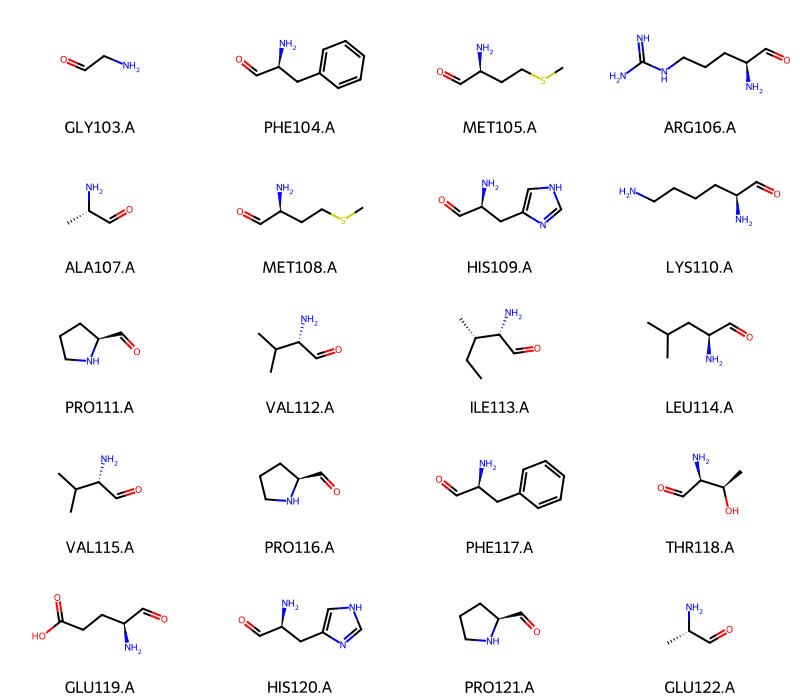

In [11]:
plf.display_residues(protein_helper.protein_mol, slice(100, 120))

In [12]:
# Standardize the protein residues
protein_helper.standardize_protein()

/tmp/ipykernel_1100227/1723010891.py:2: UserWarning: Residue MET1.A has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  protein_helper.standardize_protein()
/tmp/ipykernel_1100227/1723010891.py:2: UserWarning: Residue LYS2.A has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  protein_helper.standardize_protein()
/tmp/ipykernel_1100227/1723010891.py:2: UserWarning: Residue VAL5.A has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  protein_helper.standardize_protein()
/tmp/ipykernel_1100227/1723010891.py:2: UserWarning: Residue ARG22.A has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  protein_helper.standardize_protein()
/tmp/ipykernel_1100227/1723010891.py:2: UserWarning: Residue LYS27.A has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  prote

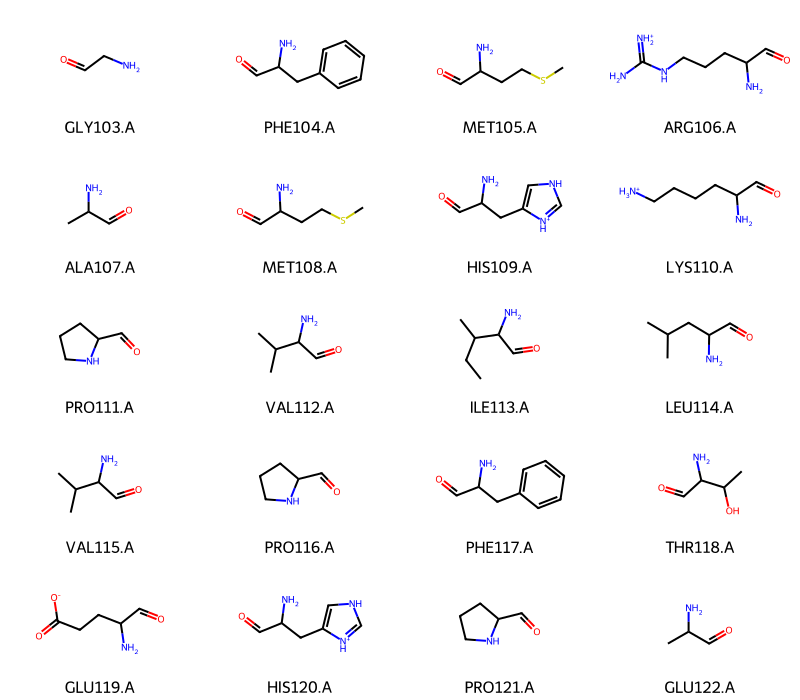

In [13]:
plf.display_residues(protein_helper.protein_mol, slice(100, 120))

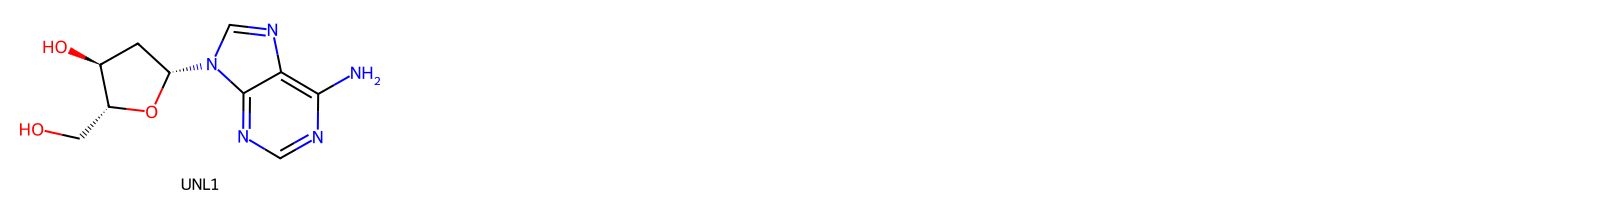

In [14]:
supplier_implicit = plf.sdf_supplier(f"{data_path}/ligand_files/1.D.sdf")
ligand_implicit = supplier_implicit[0]
plf.display_residues(ligand_implicit, size=(400, 200))

In [15]:
fp_count_implicit = plf.Fingerprint(count=True)
fp_count_implicit.run_from_iterable([ligand_implicit], protein_helper.protein_mol)

  0%|          | 0/1 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 9 interactions: ['Hydrophobic', 'HBDonor', 'HBAcceptor', 'PiStacking', 'Anionic', 'Cationic', 'CationPi', 'PiCation', 'VdWContact'] at 0x7fe4d8afd490>

In [16]:
df_implicit = fp_count_implicit.to_dataframe()
df_implicit.T
# due to the hydrogen is removed in protein, the protein cannot be hydrogen donor
# (no HBAcceptor interaction from the pointview of the ligand)

# (note that the hydrophobic interaction also affected due to the lack of explicit hydrogens)
# (might need to modify the SMARTS patterns)

Frame                         0
ligand protein  interaction    
UNL1   PHE45.A  Hydrophobic  11
       TRP67.A  Hydrophobic   1
       ASP75.A  VdWContact    3
       ASP95.A  VdWContact    4
       GLU101.A VdWContact    2
       ASN128.B VdWContact    1
       MET130.B VdWContact    1
       TYR167.B VdWContact    1
       HOH1._   VdWContact    1

In [17]:
view = fp_count_implicit.plot_lignetwork(
    ligand_implicit, kind="frame", frame=0, display_all=True
)
view

In [18]:
view = fp_count_implicit.plot_3d(
    ligand_implicit, protein_helper.protein_mol, frame=0, display_all=False
)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.